### Deep CNN Image Classifier Sentiment Analysis (Happy or Sad)

##### by Raghav Khanna

Installing dependencies

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [93]:
import os
import tensorflow as tf

In [94]:
import cv2
import imghdr

### Loading Data

Remove Dodgy Images

In [95]:
data_dir = 'data'
image_exts = ['jpeg','jpg','bmp','png']

In [96]:
os.listdir(data_dir)

['happy', 'sad']

In [97]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

In [98]:
img = cv2.imread(os.path.join('data','happy','habits-of-happy-people.jpg'))

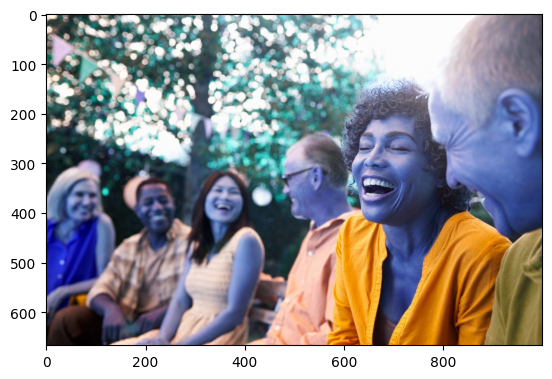

In [99]:
plt.imshow(img)

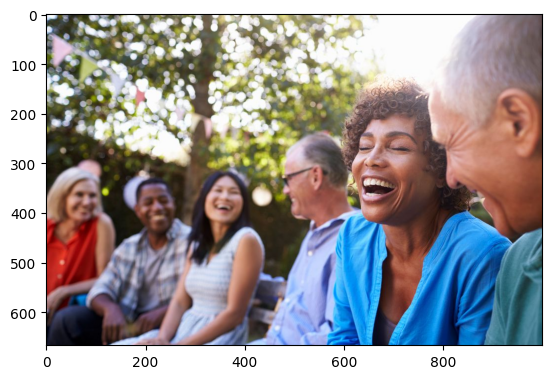

In [100]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

Creating Dataset with the help of Keras helper function. By default it creates the dataset by fixing the batch size of 32, with img size as 256 x 256.

In [101]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 181 files belonging to 2 classes.


Returns a generator object

In [102]:
data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

Creating a numpy iterator

In [103]:
data_iterator = data.as_numpy_iterator()

In [104]:
data_iterator

iterator.next() allow us to traverse through our dataset as iterator is also a generator object

In [105]:
batch = data_iterator.next()

In [106]:
batch[0].shape

(32, 256, 256, 3)

In [107]:
batch[1]

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0])

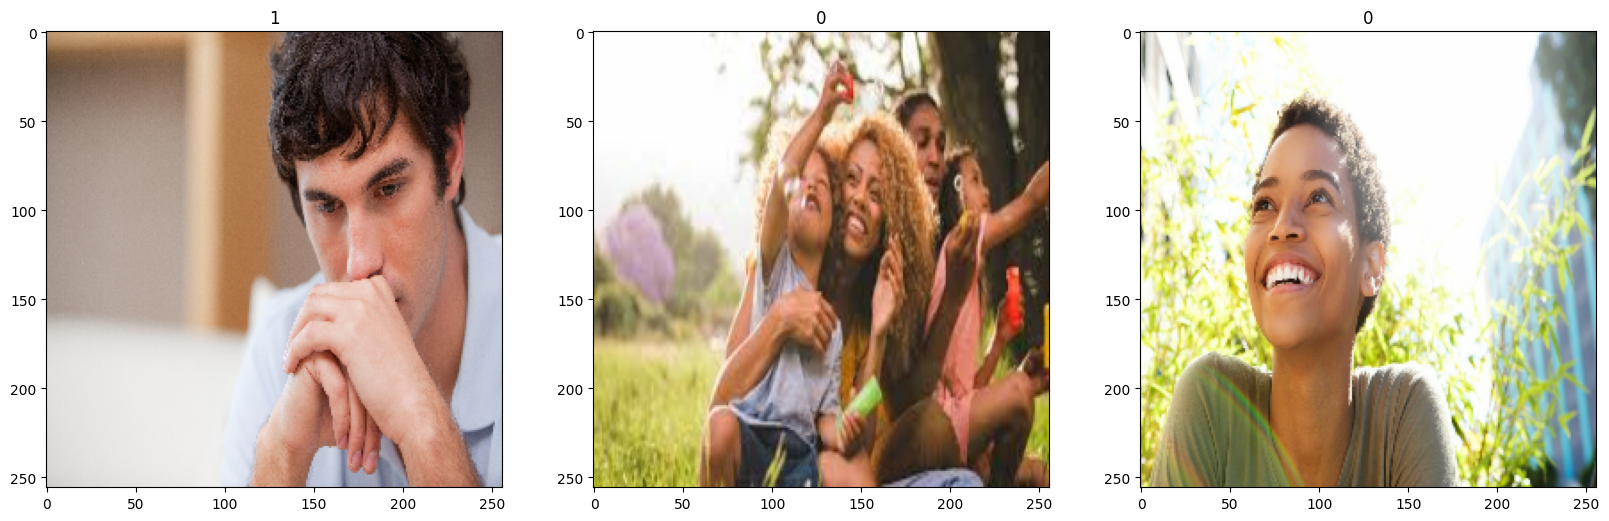

In [108]:
fig,ax = plt.subplots(ncols=3,figsize=(20,20))
for idx,img in enumerate(batch[0][:3]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Label 0 for happy and 1 for sad

In [109]:
# Running again to get another batch
batch = data_iterator.next()

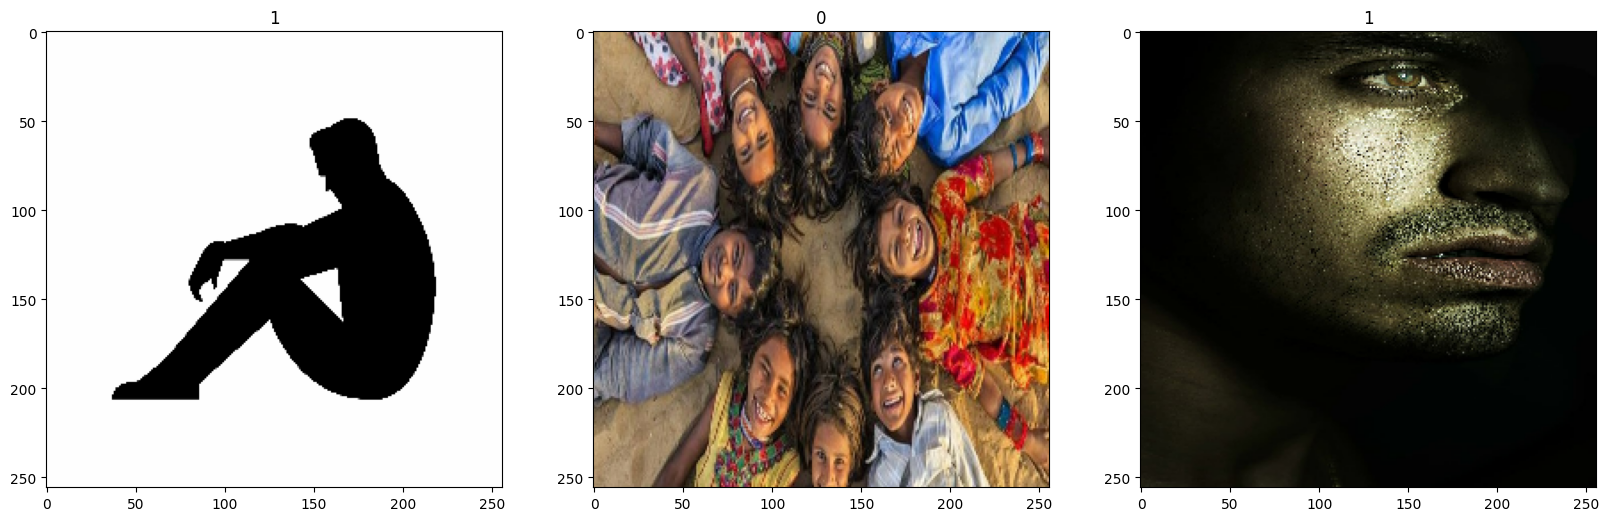

In [110]:
fig,ax = plt.subplots(ncols=3,figsize=(20,20))
for idx,img in enumerate(batch[0][:3]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### Preprocessing Data

Scale data

In [111]:
# Scale data between 0 and 1.
data = data.map(lambda x,y: (x/255, y))

In [112]:
scaled_iterator = data.as_numpy_iterator()

In [113]:
batch = scaled_iterator.next()

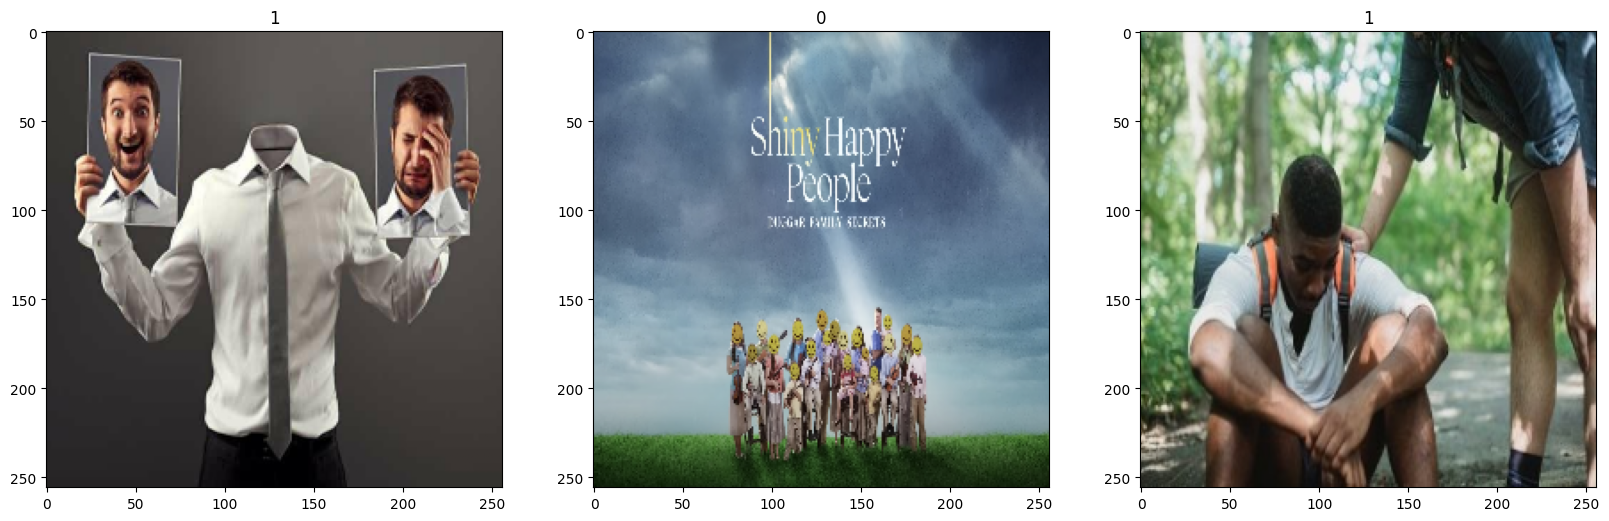

In [114]:
fig,ax = plt.subplots(ncols=3,figsize=(20,20))
for idx,img in enumerate(batch[0][:3]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

Splitting dataset

In [115]:
len(data)

6

In [116]:
train_size = int(len(data)*.6)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [117]:
val_size

2

In [118]:
train  = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

### Building the Model

In [120]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense, Flatten, Dropout

In [121]:
model = Sequential()

In [122]:
model.add(Conv2D(16,(3,3),1, activation='relu', input_shape = (256,256,3)))
model.add(MaxPool2D())

model.add(Conv2D(32,(3,3),1, activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(16,(3,3),1, activation='relu'))
model.add(MaxPool2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [123]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [124]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

Training 

In [125]:
logdir = 'logs'

In [126]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [127]:
hist = model.fit(train, epochs=20, validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
3/3 [==============================] - 12s 2s/step - loss: 1.0458 - accuracy: 0.5625 - val_loss: 0.8037 - val_accuracy: 0.3594
Epoch 2/20
3/3 [==============================] - 12s 4s/step - loss: 0.6991 - accuracy: 0.4479 - val_loss: 0.5960 - val_accuracy: 0.6250
Epoch 3/20
3/3 [==============================] - 7s 2s/step - loss: 0.6269 - accuracy: 0.6354 - val_loss: 0.6152 - val_accuracy: 0.5938
Epoch 4/20
3/3 [==============================] - 7s 2s/step - loss: 0.5630 - accuracy: 0.7396 - val_loss: 0.5104 - val_accuracy: 0.8281
Epoch 5/20
3/3 [==============================] - 6s 2s/step - loss: 0.5283 - accuracy: 0.7708 - val_loss: 0.4346 - val_accuracy: 0.7812
Epoch 6/20
3/3 [==============================] - 6s 2s/step - loss: 0.4644 - accuracy: 0.8021 - val_loss: 0.4643 - val_accuracy: 0.8438
Epoch 7/20
3/3 [==============================] - 6s 2s/step - loss: 0.5597 - accuracy: 0.7500 - val_loss: 0.5425 - val_accuracy: 0.7656
Epoch 8/20
3/3 [=======================

Plots Performance

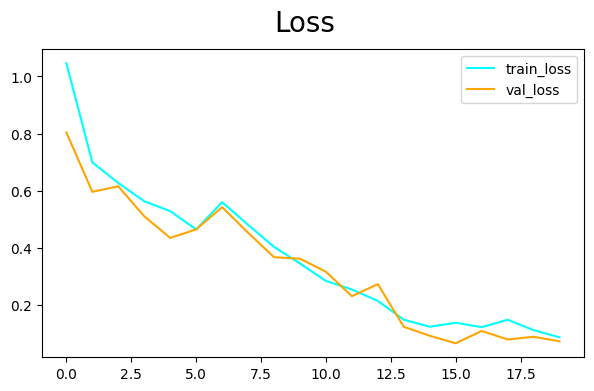

In [134]:
fig = plt.figure(figsize=(7,4))
plt.plot(hist.history['loss'],color='cyan',label='train_loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper right')
plt.show()

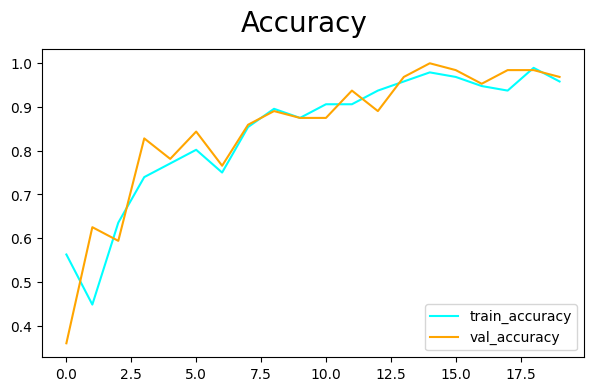

In [136]:
fig = plt.figure(figsize=(7,4))
plt.plot(hist.history['accuracy'],color='cyan',label='train_accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='lower right')
plt.show()

### Evaluating Model

In [139]:
from keras.metrics import Precision, Recall, BinaryAccuracy, F1Score

In [140]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [142]:
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 0s 327ms/step


In [144]:
print(f'Precision : {pre.result().numpy()}')
print(f'Recall : {re.result().numpy()}')
print(f'Accuracy : {acc.result().numpy()}')

Precision : 1.0
Recall : 0.7142857313156128
Accuracy : 0.9047619104385376


### Test

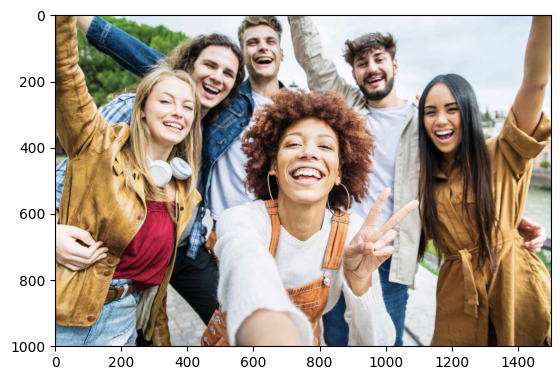

In [145]:
img = cv2.imread(os.path.join('data','test_happy.jpg'))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

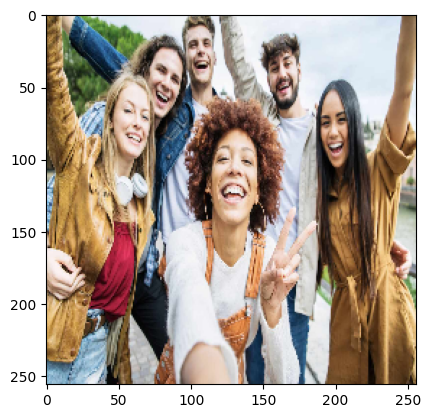

In [147]:
resize = tf.image.resize(cv2.cvtColor(img,cv2.COLOR_BGR2RGB), (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [151]:
resize.shape

TensorShape([256, 256, 3])

In [150]:
# To add extra dimension for batch input, as earlier data was passed
# in the batch size of 32. But we're testing on single image.
np.expand_dims(resize/255,0).shape

(1, 256, 256, 3)

In [152]:
yhat = model.predict(np.expand_dims(resize/255,0))
yhat

1/1 [==============================] - 0s 132ms/step


array([[0.01648109]], dtype=float32)

In [153]:
def predictClass(yhat):
    if yhat > 0.5:
        print(f'Predicted Class is Sad')
    else:
        print(f'Predicted Class is Happy')

In [154]:
predictClass(yhat)

Predicted Class is Happy


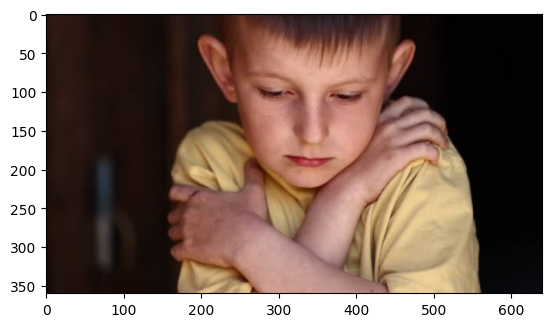

In [156]:
# Case 2.
img = cv2.imread(os.path.join('data','test_sad.jpg'))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

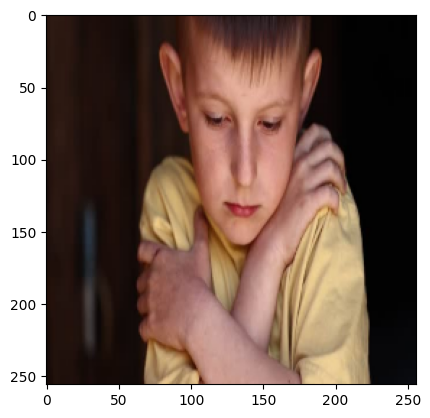

In [157]:
resize = tf.image.resize(cv2.cvtColor(img,cv2.COLOR_BGR2RGB), (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [158]:
yhat = model.predict(np.expand_dims(resize/255,0))
yhat

1/1 [==============================] - 0s 38ms/step


array([[0.8648436]], dtype=float32)

In [159]:
predictClass(yhat)

Predicted Class is Sad


### Saving the Model

In [160]:
import pickle

In [164]:
path_model = os.path.join('model/model.pkl')

In [166]:
with open(path_model,"wb") as f:
    pickle.dump(model,f)